In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
#initialization
q = QuantumRegister(2, 'q')
circ = QuantumCircuit(q)

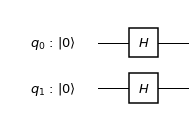

In [3]:
#superposition
circ.h(q[0])
circ.h(q[1])
circ.draw()

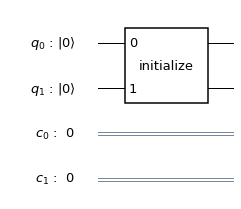

In [35]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

q = QuantumRegister(2, "q")
c = ClassicalRegister(2,'c')
circ = QuantumCircuit(q, c, name="initializer_circ")

desired_vector = [
 1,
    0,
    0,
    0,]

circ.initialize(desired_vector, [q[0], q[1]])

circ.draw()


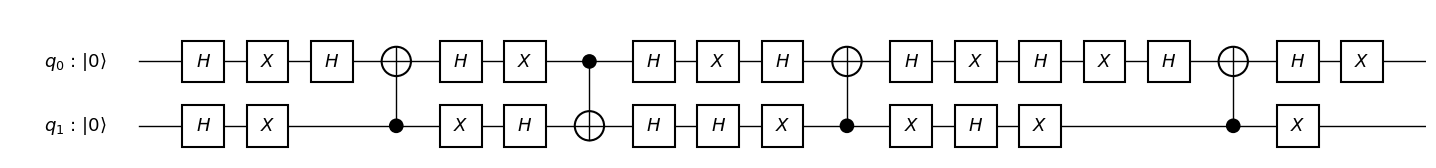

In [11]:
#phase inverstion of |00>
circ.x(q[0])
circ.h(q[0])
circ.x(q[1])
circ.cx(q[1], q[0])
circ.h(q[0])
circ.x(q[1])
circ.x(q[0])
circ.draw()


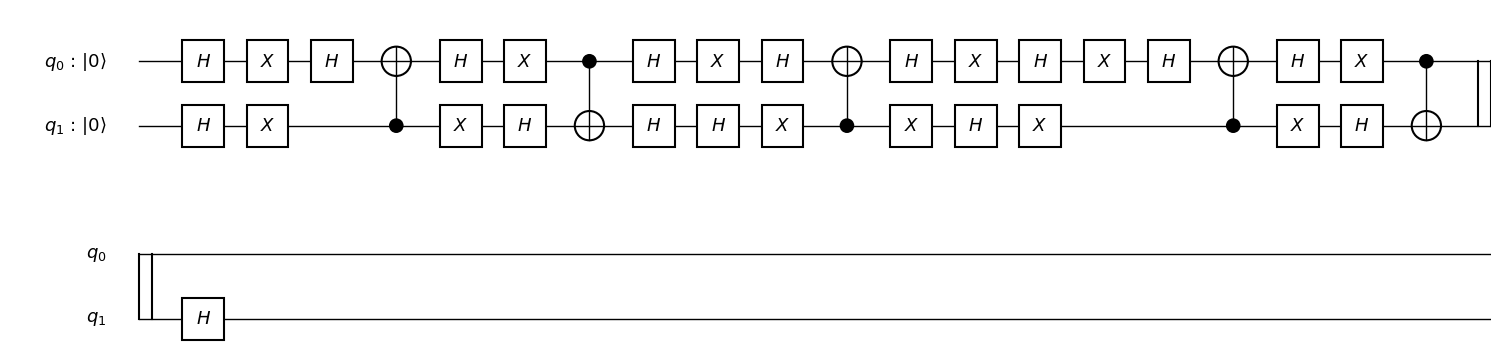

In [12]:
#phase inverstion of |11>
circ.h(q[1])
circ.cx(q[0], q[1])
circ.h(q[1])
circ.draw()

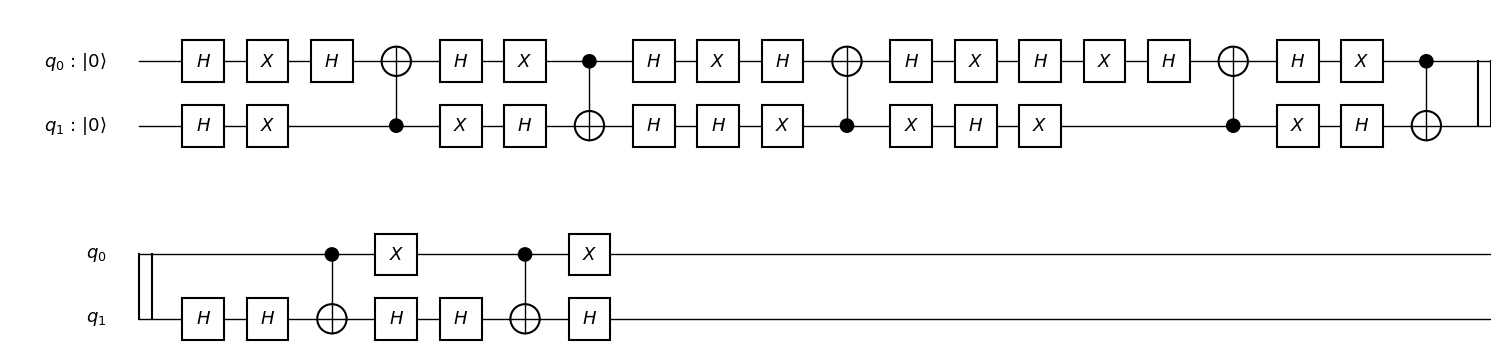

In [13]:
#phase inverstion of |10>
circ.h(q[1])
circ.cx(q[0], q[1])
circ.h(q[1])
circ.draw()
circ.h(q[1])
circ.x(q[0])
circ.cx(q[0], q[1])
circ.h(q[1])
circ.x(q[0])
circ.draw()

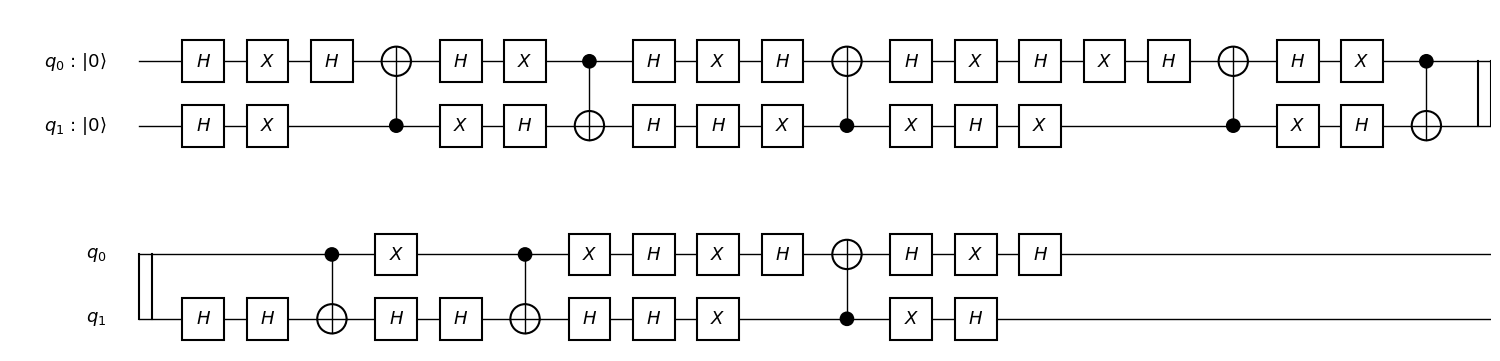

In [14]:
#Diffusion Operator
circ.h(q[0])
circ.h(q[1])
circ.x(q[0])
circ.h(q[0])
circ.x(q[1])
circ.cx(q[1], q[0])
circ.h(q[0])
circ.x(q[1])
circ.x(q[0])
circ.h(q[0])
circ.h(q[1])
circ.draw()


In [15]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]
 [-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j -0.5+0.j  0.5+0.j]]


In [16]:
# Import Aer
from qiskit import BasicAer

# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[ 0.5-0.j  0.5-0.j -0.5+0.j -0.5+0.j]


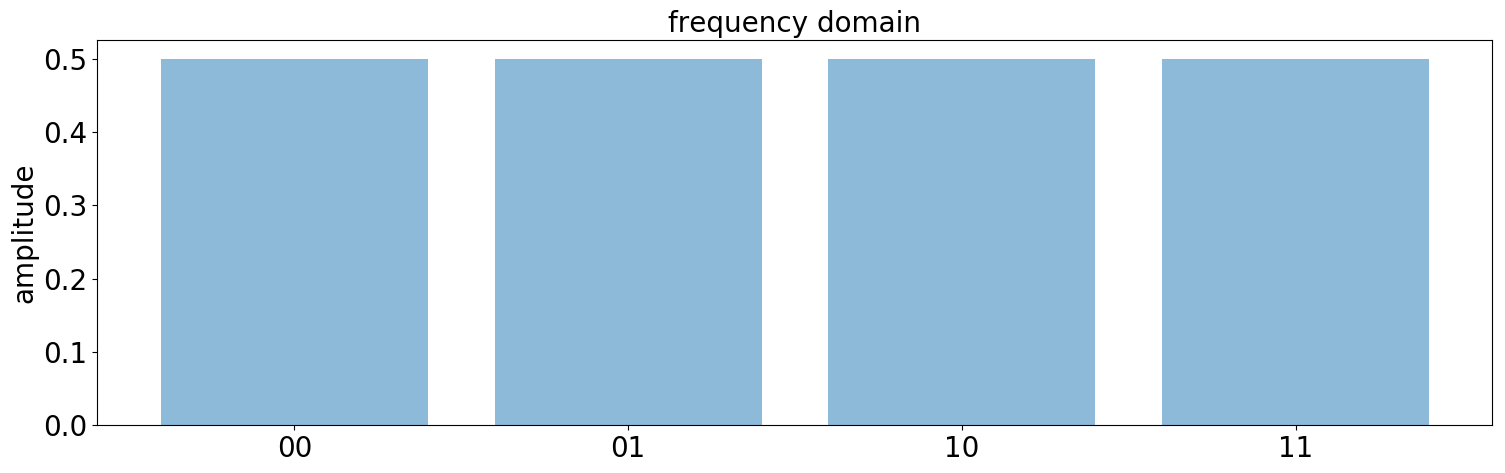

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,5))
#objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10','11',
#           '12','13','14','15')
objects = ('00', '01', '10', '11')
y_pos = np.arange(len(objects))
x=np.absolute(outputstate)
x=x[0:4]
plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('amplitude')
plt.title('frequency domain')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()

